# G2M insight for Cab Investment Firm

### Step 1: Importing Necessary Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['agg.path.chunksize'] = 10000
import seaborn as sns
sns.set()
import xlrd

### Step 2: Merge all datasets into one csv file 

### Read the final csv file

In [2]:
dataf = pd.read_csv("./Master_Cab_Data.csv")
city_d = pd.read_csv("./City.csv")
cab_d = pd.read_csv("./Cab_Data.csv")
customer_d = pd.read_csv("./Customer_ID.csv")
transaction_d = pd.read_csv("./Transaction_ID.csv")

dataf.head()

C:\Users\aaroh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,6,8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011.0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,$313.64,29290,Male,28.0,"$10,813.00",Card
1,10000012.0,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,$334.85,27703,Male,27.0,"$9,237.00",Card
2,10000013.0,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,$97.63,28712,Male,53.0,"$11,242.00",Cash
3,10000014.0,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,$351.60,28020,Male,23.0,"$23,327.00",Cash
4,10000015.0,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,$97.78,27182,Male,33.0,"$8,536.00",Card


### Exploring the Dataset


In [3]:
dataf.shape 

(848681, 12)

In [4]:
dataf.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Gender', 'Age',
       'Income (USD/Month)', 'Payment_Mode'],
      dtype='object')

In [5]:
dataf.dtypes

Transaction ID        float64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip           object
Customer ID             int64
Gender                 object
Age                   float64
Income (USD/Month)     object
Payment_Mode           object
dtype: object

In [6]:
dataf.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011.0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,$313.64,29290,Male,28.0,"$10,813.00",Card
1,10000012.0,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,$334.85,27703,Male,27.0,"$9,237.00",Card
2,10000013.0,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,$97.63,28712,Male,53.0,"$11,242.00",Cash
3,10000014.0,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,$351.60,28020,Male,23.0,"$23,327.00",Cash
4,10000015.0,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,$97.78,27182,Male,33.0,"$8,536.00",Card


#### Independent Variables
- Transaction ID, a unique identifier for each trip
- Date of Travel
- Company, Which company (Pink Cab or Yellow Cab)
- City
- KM Travelled, Kilometers customer travelled
- Price Charged, Price charged from customer
- Cost of Trip, Cost to use cab on trip
- Customer ID, a unique indentifier for each customer
- Gender
- Age
- Income, (USD/Month)
- Payment_Mode

### Unique Values of all Columns

In [7]:
dataf.nunique()

Transaction ID        440098
Date of Travel          1095
Company                    2
City                      20
KM Travelled             874
Price Charged          99176
Cost of Trip           14760
Customer ID            49171
Gender                     2
Age                       48
Income (USD/Month)     46682
Payment_Mode               2
dtype: int64

In [8]:
dataf.describe()

,Transaction ID,KM Travelled,Price Charged,Customer ID,Age
count,7.994900e+05,359392.000000,359392.000000,848681.000000,98342.000000
mean,1.022037e+07,22.567254,423.443311,23550.055591,35.363121
std,1.269382e+05,12.233526,274.378911,21182.604797,12.599002
min,1.000001e+07,1.900000,15.600000,1.000000,18.000000
25%,1.011042e+07,12.000000,206.437500,3500.000000,25.000000
50%,1.022055e+07,22.440000,386.360000,14866.000000,33.000000
75%,1.033037e+07,32.960000,583.660000,43867.000000,42.000000
max,1.044011e+07,48.000000,2048.030000,60000.000000,65.000000


#### Insights:
- Average KM Travelled is 22.567 kilometers
- Average age is 35 
- Min age is 18

In [9]:
dataf.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011.0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,$313.64,29290,Male,28.0,"$10,813.00",Card
1,10000012.0,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,$334.85,27703,Male,27.0,"$9,237.00",Card
2,10000013.0,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,$97.63,28712,Male,53.0,"$11,242.00",Cash
3,10000014.0,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,$351.60,28020,Male,23.0,"$23,327.00",Cash
4,10000015.0,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,$97.78,27182,Male,33.0,"$8,536.00",Card
5,10000016.0,2016-01-07,Pink Cab,ATLANTA GA,6.06,72.43,$63.02,27318,Male,25.0,"$13,984.00",Cash
6,10000017.0,2016-01-03,Pink Cab,AUSTIN TX,44.00,576.15,$475.20,33788,Male,23.0,"$23,788.00",Card
7,10000018.0,2016-01-07,Pink Cab,AUSTIN TX,35.65,466.10,$377.89,34106,Male,19.0,"$19,980.00",Card
8,10000019.0,2016-01-12,Pink Cab,BOSTON MA,14.40,191.61,$146.88,59799,Male,33.0,"$19,271.00",Cash
9,10000020.0,2016-01-06,Pink Cab,BOSTON MA,10.89,156.98,$113.26,57982,Male,57.0,"$5,068.00",Cash


### CITY DATASET

In [10]:
print(city_d.shape)

(20, 3)


In [11]:
city_d.head(10)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [12]:
city_d.dtypes

City          object
Population    object
Users         object
dtype: object

In [13]:
city_d['Population'] = [x.replace(',','') for x in city_d['Population']]
city_d['Users'] = [x.replace(',','') for x in city_d['Users']]
city_d['Population'] = city_d['Population'].astype(float)
city_d['Users'] = city_d['Users'].astype(float)

In [14]:
city_d.dtypes

City           object
Population    float64
Users         float64
dtype: object

### TRANSACTION_ID DATASET

In [15]:
print(transaction_d.shape)

(440098, 3)


In [16]:
transaction_d.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [17]:
transaction_d.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

### Customer_ID DATASET

In [18]:
print(customer_d.shape)

(49171, 4)


In [19]:
customer_d.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [20]:
customer_d.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [21]:
dataf.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011.0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,$313.64,29290,Male,28.0,"$10,813.00",Card
1,10000012.0,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,$334.85,27703,Male,27.0,"$9,237.00",Card
2,10000013.0,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,$97.63,28712,Male,53.0,"$11,242.00",Cash
3,10000014.0,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,$351.60,28020,Male,23.0,"$23,327.00",Cash
4,10000015.0,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,$97.78,27182,Male,33.0,"$8,536.00",Card


In [22]:
dataf.dtypes

Transaction ID        float64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip           object
Customer ID             int64
Gender                 object
Age                   float64
Income (USD/Month)     object
Payment_Mode           object
dtype: object

In [23]:
final_data = cab_d.merge(transaction_d, on= 'Transaction ID').merge(customer_d, on ='Customer ID').merge(city_d, on = 'City')

In [24]:
final_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0
5,10324737,43224,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885.0,24701.0
6,10395626,43400,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885.0,24701.0
7,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885.0,24701.0
8,10079404,42634,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885.0,24701.0
9,10186994,42909,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885.0,24701.0


In [25]:
from datetime import datetime, timedelta

In [26]:
def date_f(x):
    date_str =(datetime(1899,12,30) + timedelta(x-1)).strftime("%d-%m-%Y")
    date_r =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_r

In [27]:
final_data['Date of Travel']=final_data['Date of Travel'].apply(lambda x:date_f(x))

### Features Analysis

#### Plot 1: Km Travelled vs Price Charged

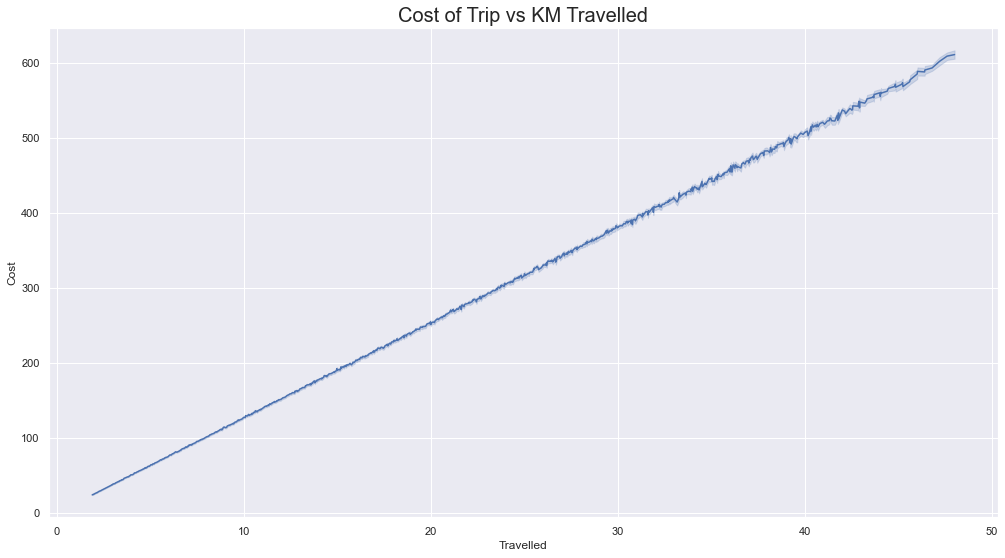

In [28]:
plt.figure(figsize=(17,9))
sns.lineplot(data=final_data, x="KM Travelled",y='Cost of Trip')
plt.title('Cost of Trip vs KM Travelled', fontsize=20)
plt.xlabel('Travelled')
plt.ylabel('Cost')
plt.show()

#### we can see there's a postive trend as the more kilometers travelled equals to more cost for the trip.

### Plot 2: KM travelled distribution

Text(0.5, 0, 'Km Travelled')

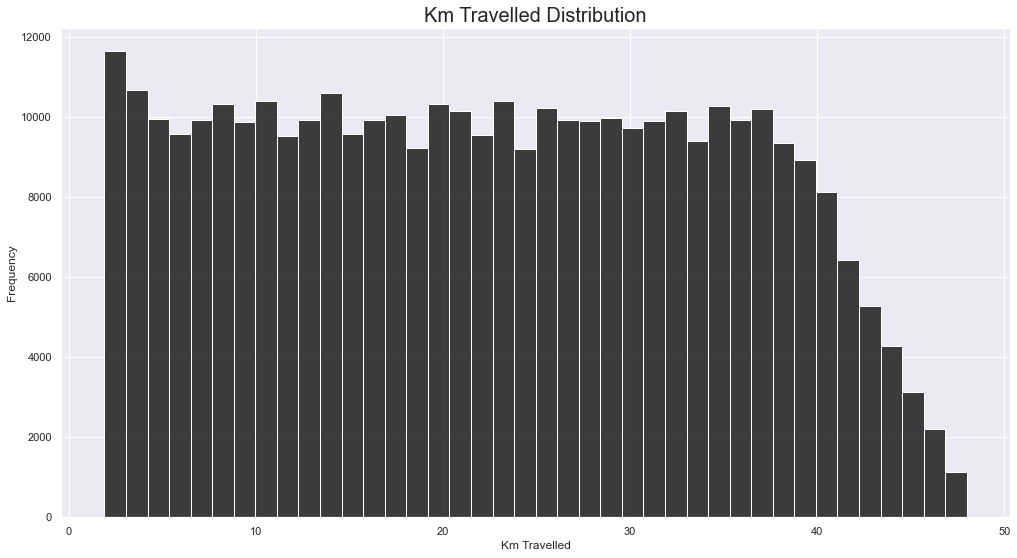

In [29]:
plt.figure(figsize=(17,9))
plot2=sns.histplot(data=final_data, x="KM Travelled",bins=40, color= 'Black')
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')

#### Majority of customers travelled close to 12000 kilometers

### Plot 3: Price Charged Distribution

Text(0.5, 0, 'Price Charged')

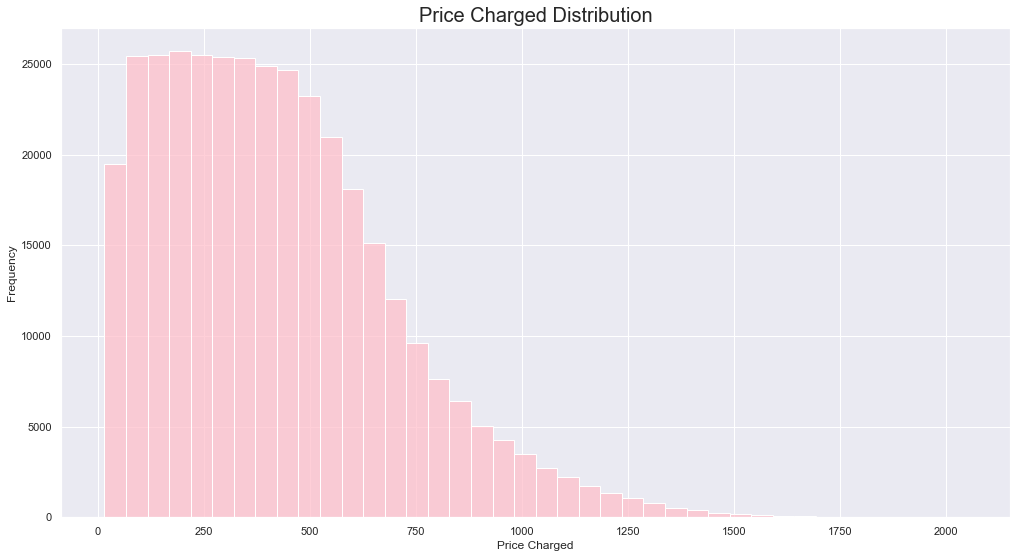

In [31]:
plt.figure(figsize=(17,9))
plot2=sns.histplot(data=final_data, x="Price Charged",bins=40, color= 'pink')
plt.title('Price Charged Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Price Charged')

#### Majority were charged from 100 - 450 Dollars

### Plot 4:  Customer Age Distributions

Text(0.5, 0, 'Age')

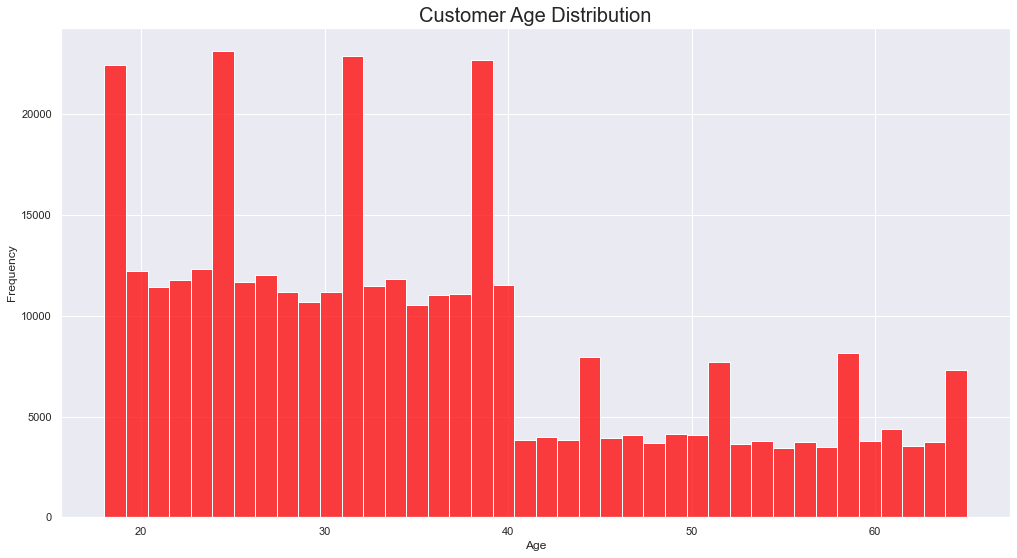

In [32]:
plt.figure(figsize=(17,9))
plot2=sns.histplot(data=final_data, x="Age",bins=40, color= 'red')
plt.title('Customer Age Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Age')

#### Majority of customers are between 20-40

### Plot 5: Payment Methods

Text(0.5, 0, 'Payment Method')

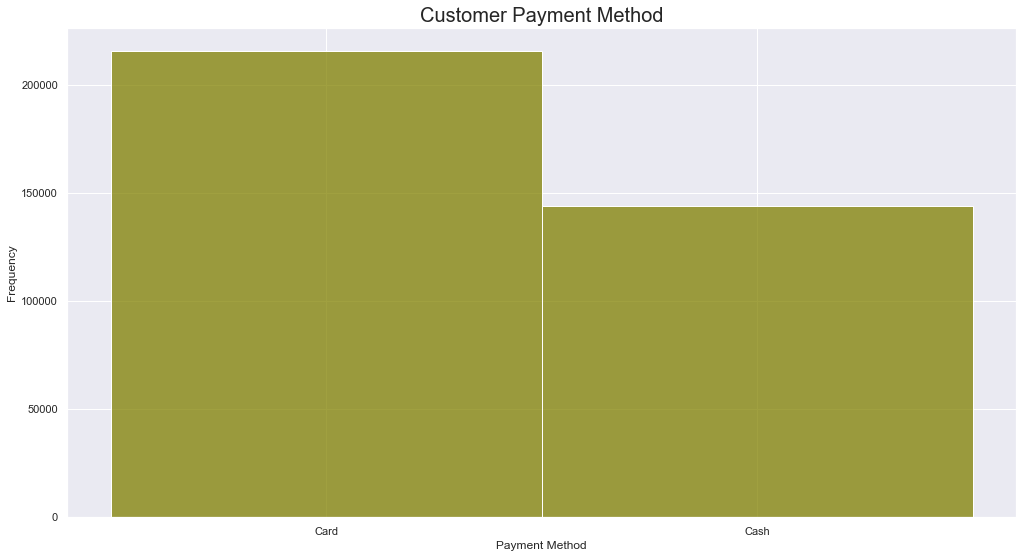

In [33]:
plt.figure(figsize=(17,9))
plot2=sns.histplot(data=final_data, x="Payment_Mode", color = "olive")
plt.title('Customer Payment Method', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Payment Method')

#### Most customer's payment method is by using a card.

### Plot 6: Users per City

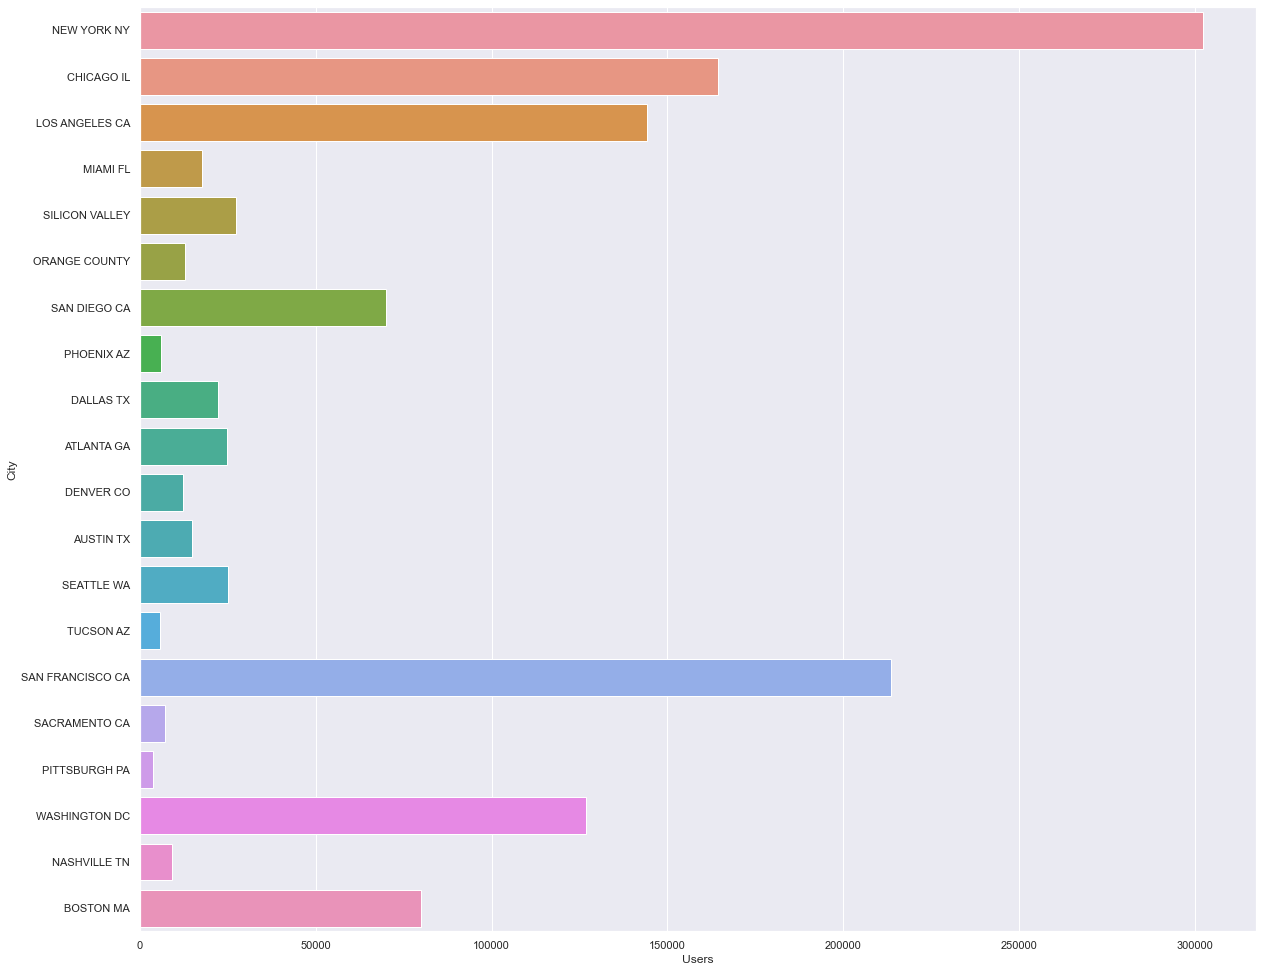

In [34]:
plt.figure(figsize=(20, 17));
pl6=sns.barplot(x="Users", y="City", data=city_d);

#### Majority of users are based in New York City as their population is quite high.

### Plot 7: Income Distribution

<Figure size 1656x1440 with 0 Axes>

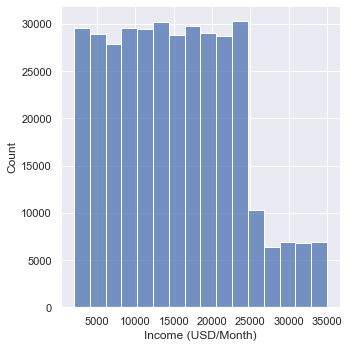

In [35]:
plt.figure(figsize=(23,20))
sns.displot(final_data['Income (USD/Month)'], bins = 16)
plt.show()

#### Most users have an income from 5000 - 25000 USD/month

In [36]:
final_data.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                   float64
Users                        float64
dtype: object

In [37]:
final_data['Income (USD/Month)'] = final_data['Income (USD/Month)'].astype(float)
final_data.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)           float64
Population                   float64
Users                        float64
dtype: object

In [38]:
final_data.apply(lambda x: sum(x.isnull()),axis=0)

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

####  No missing values.

### Additional Columns 

In [39]:
final_data['Profit'] = final_data['Price Charged'] - final_data['Cost of Trip']
final_data.sort_values('Date of Travel').head(7)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit
12812,10000429,2016-01-01,Yellow Cab,BOSTON MA,15.15,342.62,205.4340,57474,Card,Male,34,16558.0,248968.0,80021.0,137.1860
43828,10000525,2016-01-01,Yellow Cab,CHICAGO IL,2.18,51.47,26.4216,4551,Cash,Male,19,6316.0,1955130.0,164468.0,25.0484
297325,10001234,2016-01-01,Yellow Cab,SEATTLE WA,39.60,1119.67,541.7280,38146,Cash,Male,36,6577.0,671238.0,25063.0,577.9420
316639,10001311,2016-01-01,Yellow Cab,WASHINGTON DC,34.65,707.94,474.0120,53048,Card,Male,23,31566.0,418859.0,127001.0,233.9280
171893,10000927,2016-01-01,Yellow Cab,NEW YORK NY,34.56,1121.11,485.2224,1808,Cash,Male,59,18999.0,8405837.0,302149.0,635.8876
111181,10000721,2016-01-01,Yellow Cab,LOS ANGELES CA,19.20,529.23,246.5280,8117,Cash,Male,21,5946.0,1595037.0,144132.0,282.7020
316506,10001303,2016-01-01,Yellow Cab,WASHINGTON DC,41.07,855.57,522.4104,51417,Cash,Male,30,4042.0,418859.0,127001.0,333.1596


In [40]:
from datetime import datetime, timedelta
def date_f(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    datee =  datetime.strptime(date_str, "%d-%m-%Y")
    return datee

In [41]:
final_data['Date of Travel'] = final_data['Date of Travel'].apply(lambda x:date_f(x))

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [62]:
final_data['Travel_year_Month'] = pd.to_datetime(final_data['Date of Travel']).dt.to_period('M')
final_data['Year of Travel']=pd.DatetimeIndex(final_data['Date of Travel']).year
final_data['Month of Travel']=pd.DatetimeIndex(final_data['Date of Travel']).month
final_data

,Transaction_ID,Date of Travel,Company,City,KM_Travelled,Price Charged,Cost_of_Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Travel_year_Month,Travel_year,Travel_month,Year of Travel,Month of Travel
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813.0,814885.0,24701.0,57.3150,2016-01,2016,1,2016,1
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813.0,814885.0,24701.0,281.2772,2018-07,2018,7,2018,7
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813.0,814885.0,24701.0,194.6480,2018-11,2018,11,2018,11
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237.0,814885.0,24701.0,23.6660,2016-01,2016,1,2016,1
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237.0,814885.0,24701.0,253.9808,2018-04,2018,4,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-02,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829.0,418859.0,127001.0,143.6180,2018-03,2018,3,2018,3
359388,10319775,2018-04-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829.0,418859.0,127001.0,23.0464,2018-04,2018,4,2018,4
359389,10347676,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829.0,418859.0,127001.0,-5.8540,2018-07,2018,7,2018,7
359390,10358624,2018-08-01,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829.0,418859.0,127001.0,-6.0900,2018-08,2018,8,2018,8


In [63]:
yellow_cab.dtypes

Transaction_ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM_Travelled                 float64
Price Charged                float64
Cost_of_Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)           float64
Population                   float64
Users                        float64
Profit                       float64
Travel_year_Month          period[M]
Travel_year                    int64
Travel_month                   int64
dtype: object

#### Date of travel is in the right data type

### Separating Yellow Cab data and Pink Cab data.

#### Yellow Cab data first

In [64]:
yellow_cab = final_data[final_data.Company.isin(["Yellow Cab"])]
yellow_cab.head()

,Transaction_ID,Date of Travel,Company,City,KM_Travelled,Price Charged,Cost_of_Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Travel_year_Month,Travel_year,Travel_month,Year of Travel,Month of Travel
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813.0,814885.0,24701.0,281.2772,2018-07,2018,7,2018,7
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813.0,814885.0,24701.0,194.6480,2018-11,2018,11,2018,11
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237.0,814885.0,24701.0,253.9808,2018-04,2018,4,2018,4
5,10324737,2018-05-03,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237.0,814885.0,24701.0,50.8912,2018-05,2018,5,2018,5
8,10079404,2016-09-20,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242.0,814885.0,24701.0,210.0920,2016-09,2016,9,2016,9


#### Pink Cab data 

In [65]:
pink_cab = final_data[final_data.Company.isin(["Pink Cab"])]
pink_cab.head()

,Transaction_ID,Date of Travel,Company,City,KM_Travelled,Price Charged,Cost_of_Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Travel_year_Month,Travel_year,Travel_month,Year of Travel,Month of Travel
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813.0,814885.0,24701.0,57.315,2016-01,2016,1,2016,1
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237.0,814885.0,24701.0,23.666,2016-01,2016,1,2016,1
6,10395626,2018-10-26,Pink Cab,ATLANTA GA,13.39,167.03,141.934,27703,Card,Male,27,9237.0,814885.0,24701.0,25.096,2018-10,2018,10,2018,10
7,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242.0,814885.0,24701.0,27.568,2016-01,2016,1,2016,1
11,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327.0,814885.0,24701.0,25.798,2016-01,2016,1,2016,1


### Plot 8: Pink Cab users vs Yellow Cab users 

C:\Users\aaroh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


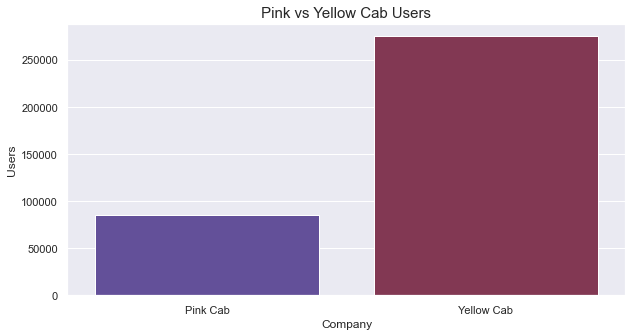

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(final_data.Company, palette = "twilight")
plt.title(" Pink vs Yellow Cab Users ", size = 15)
plt.xlabel("Company")
plt.ylabel("Users")
plt.show()

### Plot 8: Pink vs Yellow Cab Profit

<AxesSubplot:title={'center':' PROFIT PER COMPANY '}, ylabel='Profit'>

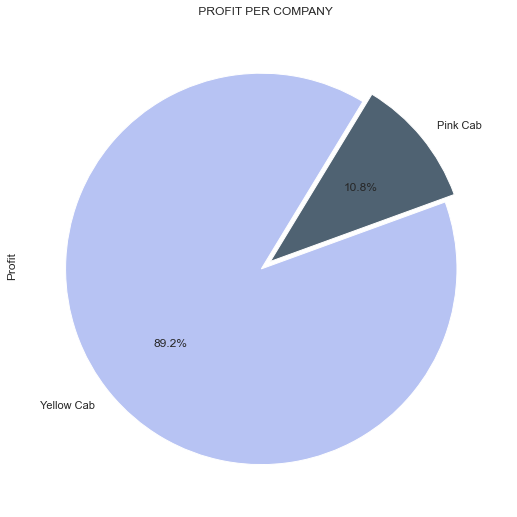

In [67]:
plt.title(" PROFIT PER COMPANY ")
profits = final_data.groupby('Company')['Profit'].sum()
colour = ['#4F6272', '#B7C3F3']
profits.plot(kind='pie',y='Company',startangle=20,figsize=(17,9),autopct='%1.1f%%',explode=[0.03]*2, colors = colour)

#### We can see Yellow Cab makes 89.2% of total profits

In [68]:
yellow_cab.dtypes

Transaction_ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM_Travelled                 float64
Price Charged                float64
Cost_of_Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)           float64
Population                   float64
Users                        float64
Profit                       float64
Travel_year_Month          period[M]
Travel_year                    int64
Travel_month                   int64
Year of Travel                 int64
Month of Travel                int64
dtype: object

#### Date of travel is in the right data type

In [69]:
# renaming columns

final_data.rename(columns = {'Transaction ID':'Transaction_ID'}, inplace = True)
final_data.rename(columns = {'KM Travelled':'KM_Travelled'}, inplace = True)
final_data.rename(columns = {'Cost of Trip':'Cost_of_Trip'}, inplace = True)
yellow_cab.head(1)

,Transaction_ID,Date of Travel,Company,City,KM_Travelled,Price Charged,Cost_of_Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Travel_year_Month,Travel_year,Travel_month,Year of Travel,Month of Travel
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.7,317.4228,29290,Cash,Male,28,10813.0,814885.0,24701.0,281.2772,2018-07,2018,7,2018,7


In [70]:
pink_cab.head(1)

,Transaction_ID,Date of Travel,Company,City,KM_Travelled,Price Charged,Cost_of_Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Travel_year_Month,Travel_year,Travel_month,Year of Travel,Month of Travel
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813.0,814885.0,24701.0,57.315,2016-01,2016,1,2016,1


### Plot 9: Number of Transactions (Yearly) per Company

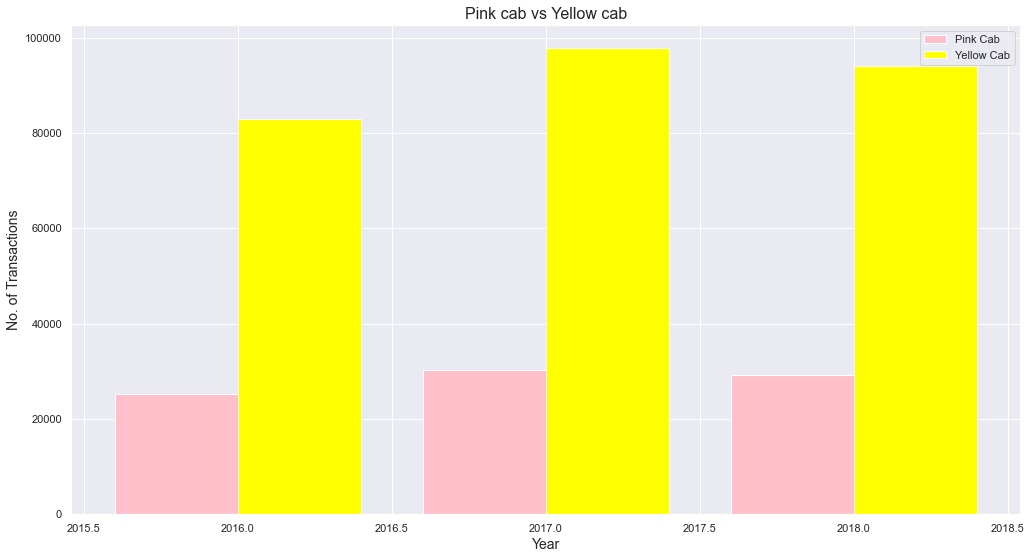

In [71]:
pl1 = pink_cab.groupby("Year of Travel").Transaction_ID.count()
pl2 = yellow_cab.groupby("Year of Travel").Transaction_ID.count()


plt.figure(figsize=(17,9))
ax1 = plt.subplot(111)
ax1.bar(pl1.index-0.2, pl1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax1.bar(pl1.index+0.2, pl2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

#### On a yearly basis, Yellow Cab has significantly more # of transactions than Pink Cab

### Plot 10: Pink Cab KM Travelled

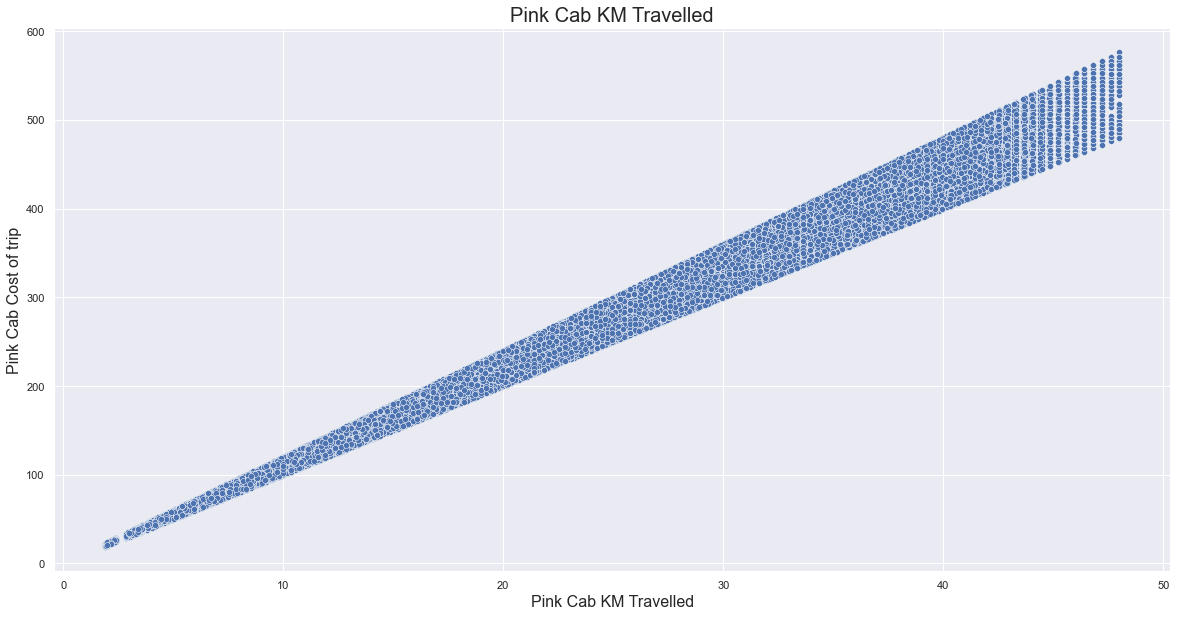

In [80]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=pink_cab, x='KM_Travelled', y='Cost_of_Trip')
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Cost of trip',fontsize = 16)
plt.xlabel('Pink Cab KM Travelled',fontsize = 16)
plt.show()

### Plot 11: Yellow Cab KM Travelled

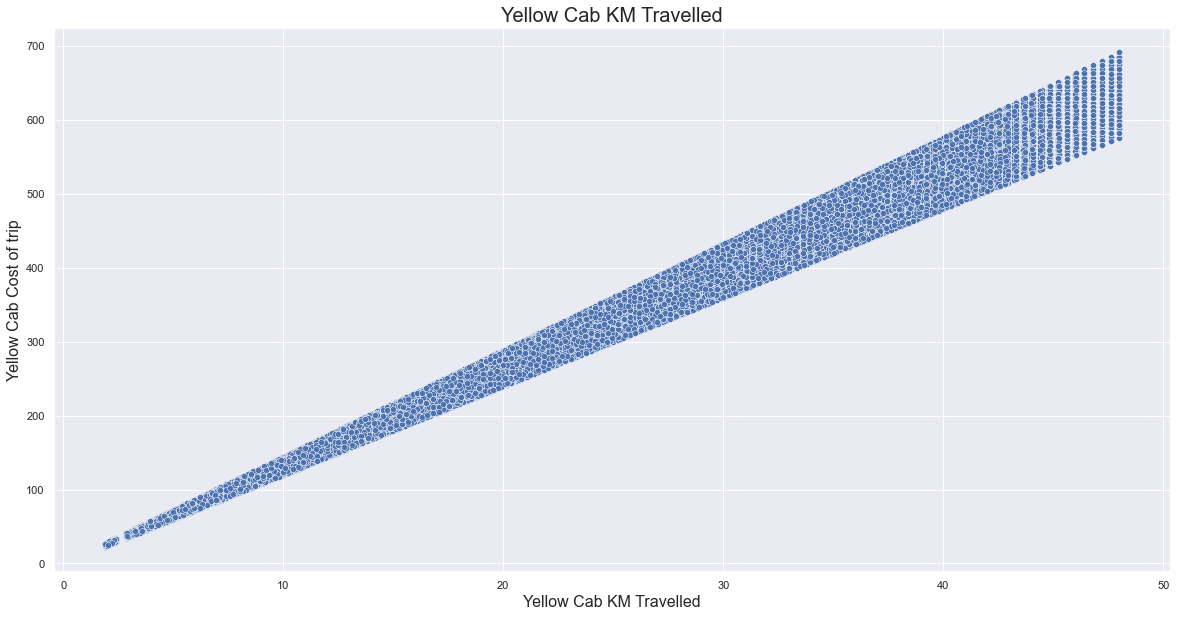

In [83]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=yellow_cab, x='KM_Travelled', y='Cost_of_Trip', palette ="pink")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Cost of trip',fontsize = 16)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 16)
plt.show()

#### Cost of trips for both yellow cab and pink cab are relatively the same.

In [84]:
final_data.head()

,Transaction_ID,Date of Travel,Company,City,KM_Travelled,Price Charged,Cost_of_Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Travel_year_Month,Travel_year,Travel_month,Year of Travel,Month of Travel
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813.0,814885.0,24701.0,57.3150,2016-01,2016,1,2016,1
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813.0,814885.0,24701.0,281.2772,2018-07,2018,7,2018,7
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813.0,814885.0,24701.0,194.6480,2018-11,2018,11,2018,11
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237.0,814885.0,24701.0,23.6660,2016-01,2016,1,2016,1
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237.0,814885.0,24701.0,253.9808,2018-04,2018,4,2018,4


### Analyzing Profit 

### Plot 12: Profit per Month (Pink vs Yellow Cab)

C:\Users\aaroh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


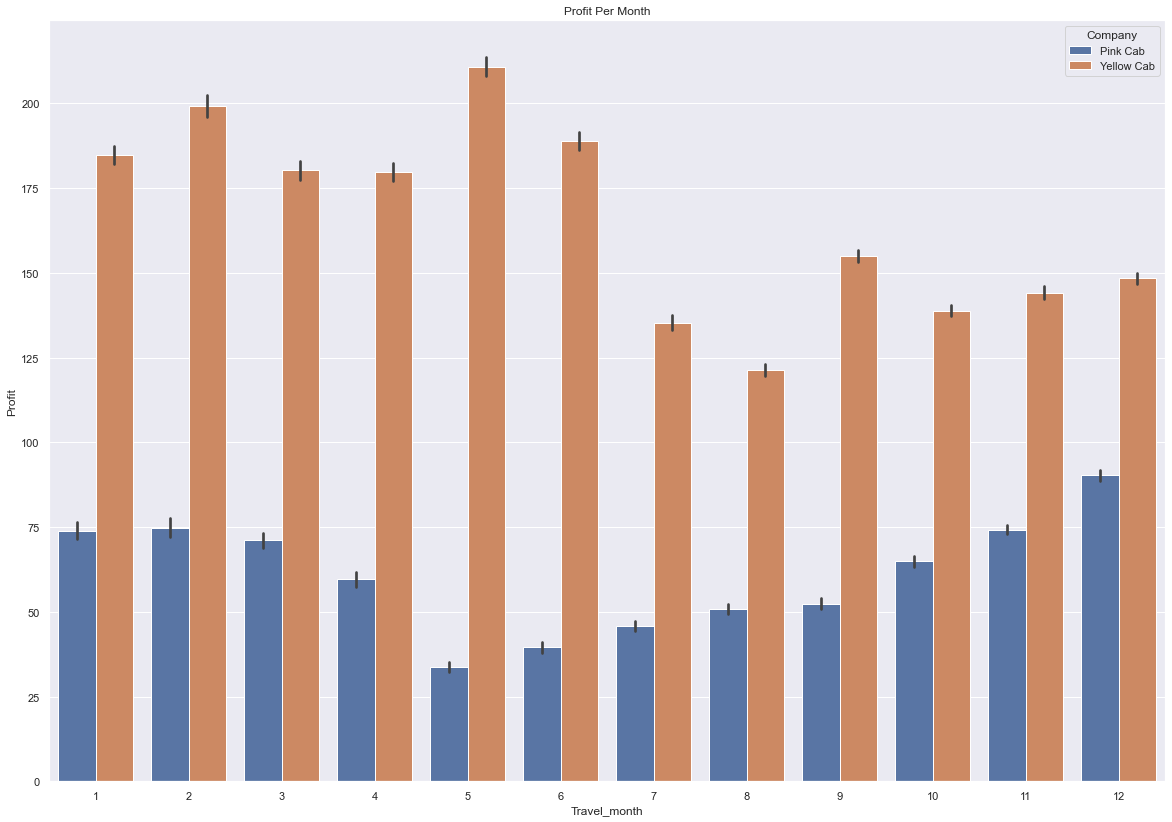

In [86]:
plt.figure(figsize=(20,14))
po= sns.barplot(final_data['Travel_month'], final_data["Profit"], hue="Company", data=final_data)
plt.title("Profit Per Month")
plt.show()

#### Yelllow Cab makes more profit monthly

### Plot 13: Profit Per Year

In [88]:
pivot_year_profit = final_data.pivot_table(index = ['Travel_year'], columns = 'Company', values = 'Profit', aggfunc = 'sum')
pivot_year_profit

Company,Pink Cab,Yellow Cab
Travel_year,,
2016,1739882.628,1.407389e+07
2017,2015100.657,1.646427e+07
2018,1552345.036,1.348222e+07


TypeError: 'str' object is not callable

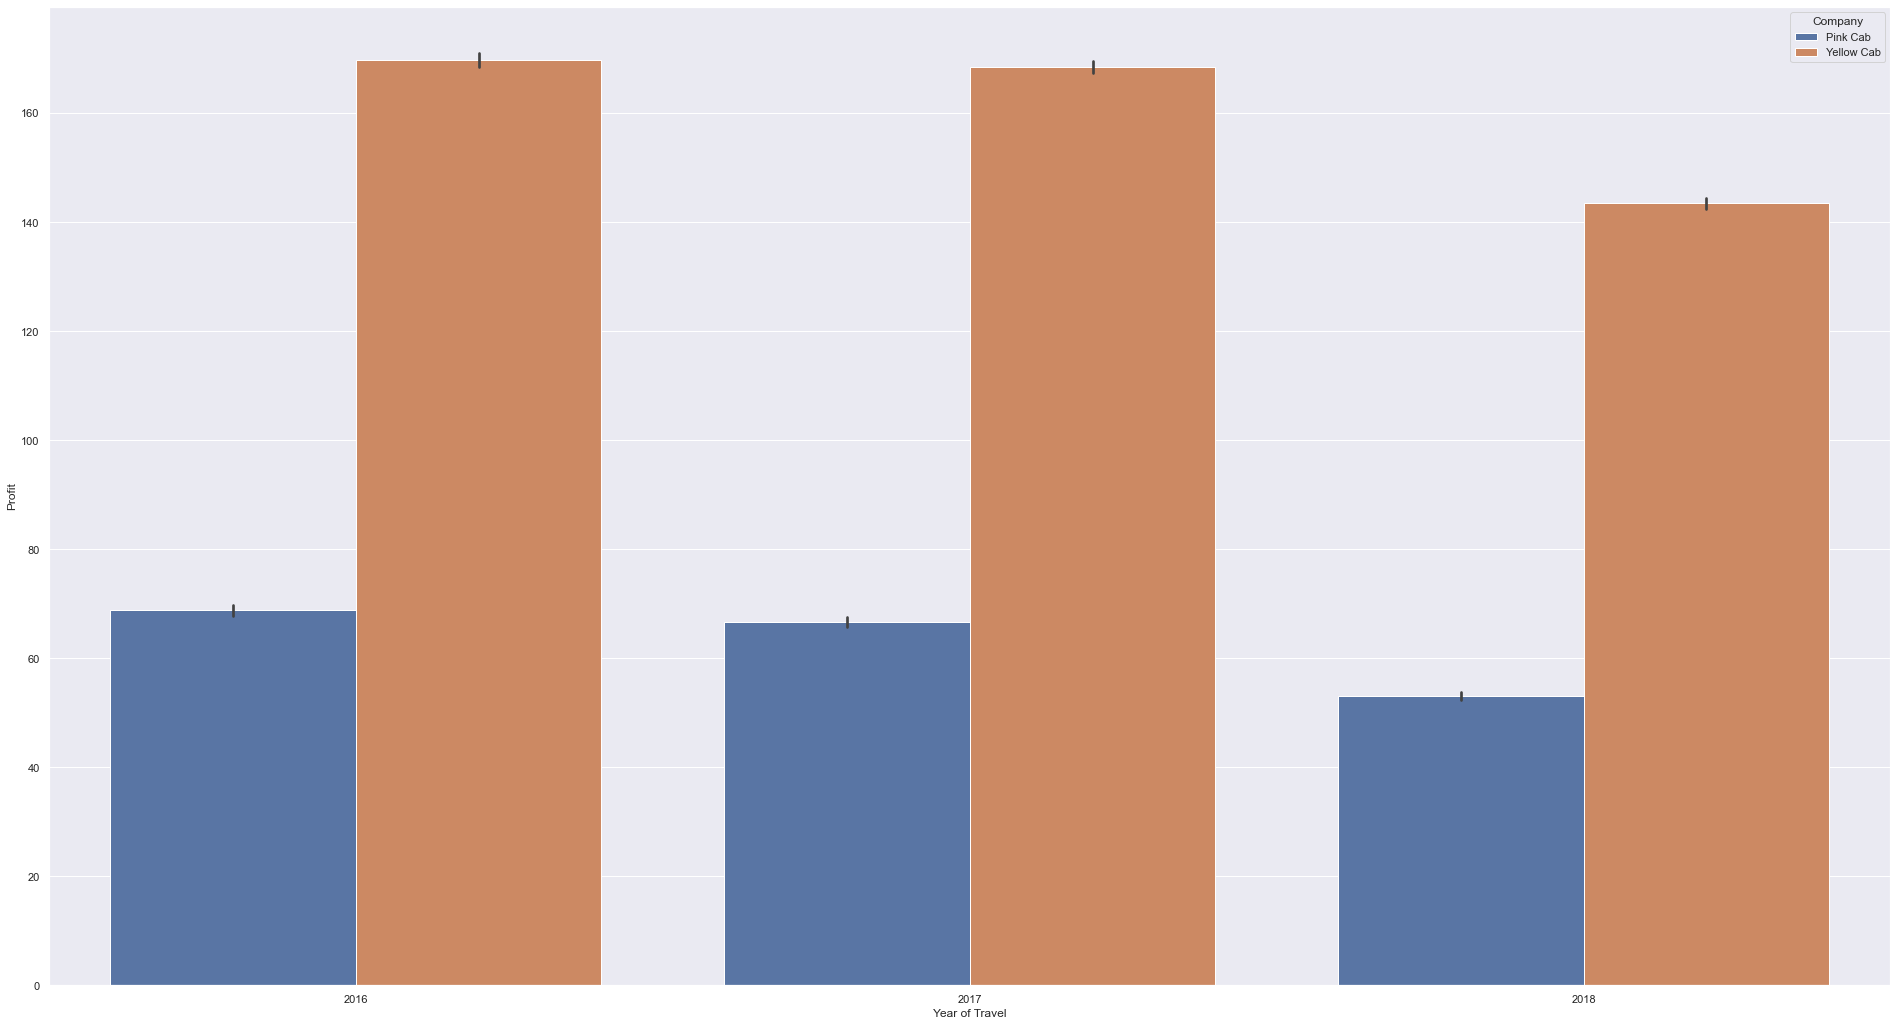

In [102]:
plt.figure(figsize=(33,18))
p11=sns.barplot(data=final_data, x=final_data["Year of Travel"], y=final_data["Profit"], hue='Company')
plt.title('Profit Per Year',fontsize = 20)
plt.ylabel("Profit",fontsize = 16)
plt.xlabel("Year",fontsize = 16)
plt.show

C:\Users\aaroh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: 'str' object is not callable

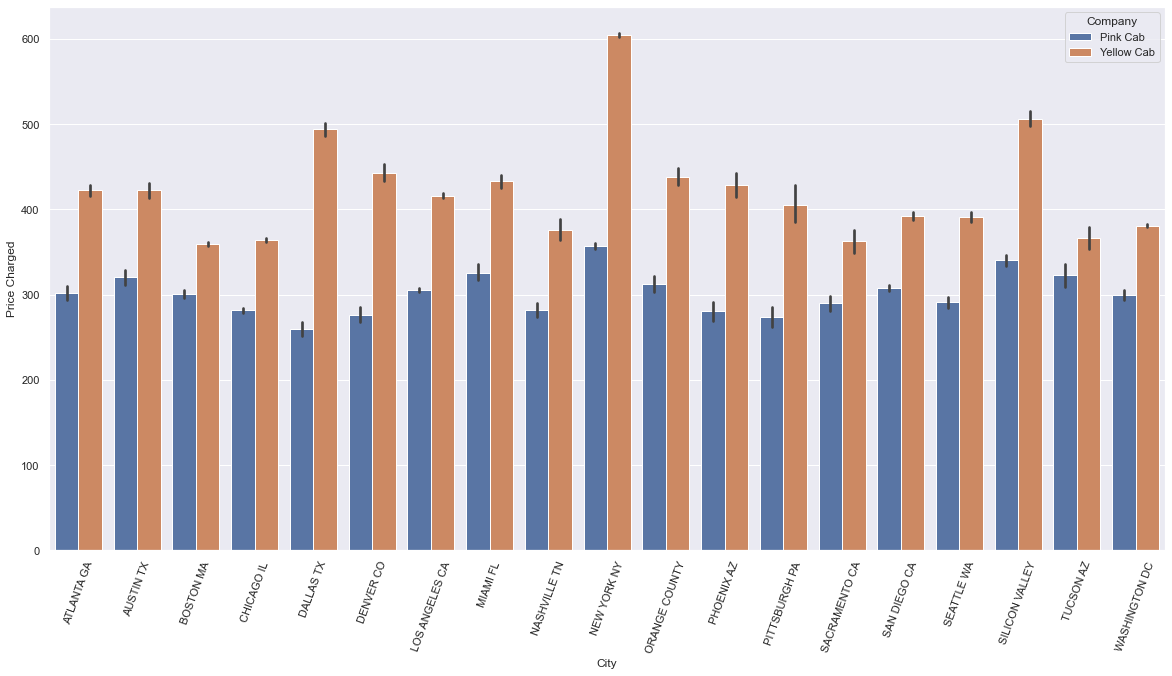

In [106]:
plt.figure(figsize=(20,10))
sns.barplot(final_data['City'],final_data['Price Charged'], hue='Company',data=final_data)
xt = plt.xticks(rotation=70)
plt.title("Profit Per City")
plt.show

#### Yellow Cab charges more overall in comparison to Pink Cab in every city. Pink Cab have consistent profit across all cities.

## Conclusion

- Most customers travel with Yellow Cab 
- Yellow Cab is more perferable to customers
- Yellow Cab charges more in populated cities incomparison to Pink Cab 
- Yellow Cab owns 89% of the profit; Pink Cab 10.8%
- Pink Cab has consistent profits
- Yellow Cab strategically charges more for their services in highly-populated cities 

I would advise XYZ company to invest in Yellow Cab for their consistent high performance.